In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('F:\WsCube Tech\Projects\Python\Expanded_data_with_more_features.csv')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\User\AppData\Local\Temp\ipykernel_9392\1524110483.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv('F:\WsCube Tech\Projects\Python\Expanded_data_with_more_features.csv')


In [3]:
df.shape

(30641, 15)

In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


In [9]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [10]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [11]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('5-Oct','5-10')

In [12]:
df['Gender'].value_counts()

Gender
female    15424
male      15217
Name: count, dtype: int64

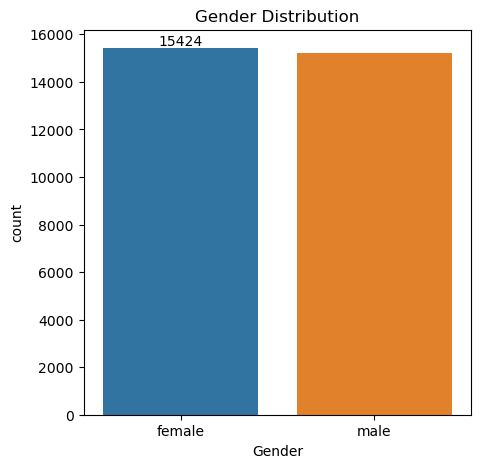

In [24]:
# Gender distribution

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Gender', data=df, hue='Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [18]:
 gb = df.groupby('ParentEduc')[['MathScore',	'ReadingScore',	'WritingScore']].mean()

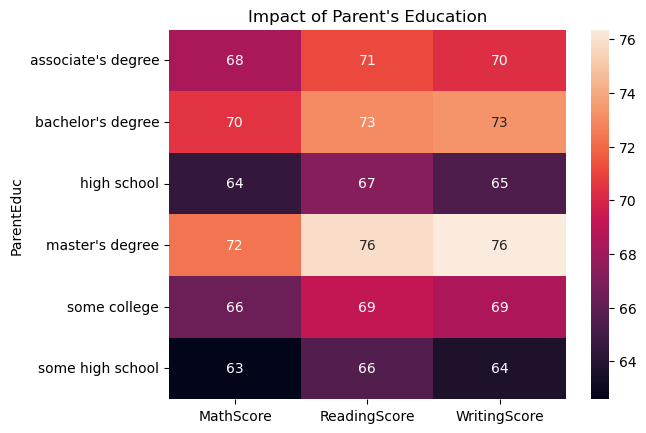

In [25]:
# Impact 0f parent's education on kids scores

sns.heatmap(data=gb, annot=True)
plt.title("Impact of Parent's Education")
plt.show()

In [22]:
 gb2 = df.groupby('ParentMaritalStatus')[['MathScore',	'ReadingScore',	'WritingScore']].mean()

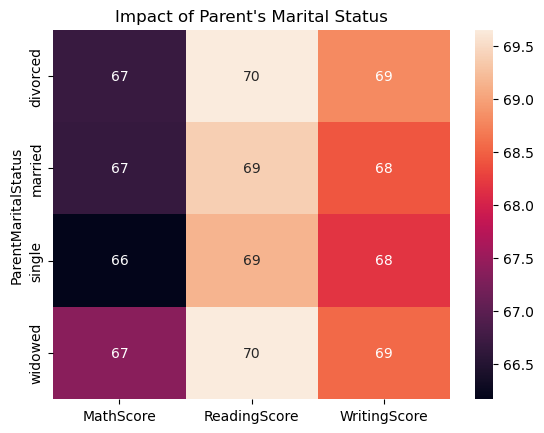

In [26]:
# Impact of parent's marital status on kids scores

sns.heatmap(data=gb2, annot=True)
plt.title("Impact of Parent's Marital Status")
plt.show()

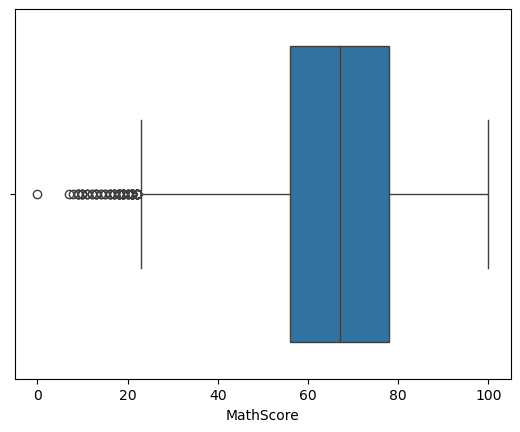

In [31]:
sns.boxplot(data=df, x= 'MathScore')

plt.show()

In [40]:
df['EthnicGroup'].nunique()

5

In [60]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [75]:
# Distribution of Ethnic Groups

ax = df.groupby('EthnicGroup')['Gender'].count()

In [71]:
ax

EthnicGroup
group A    2219
group B    5826
group C    9212
group D    7503
group E    4041
Name: Gender, dtype: int64

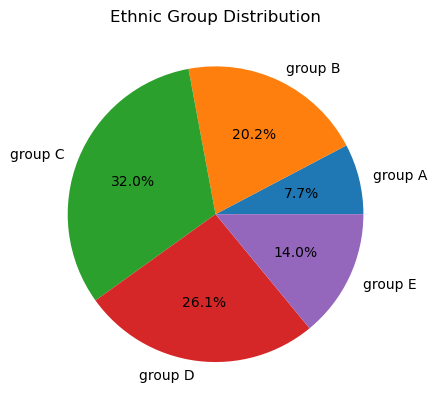

In [77]:
labels = ['group A', 'group B', 'group C','group D','group E']
plt.pie(ax, labels=labels, autopct='%1.1f%%')
plt.title('Ethnic Group Distribution')
plt.show()

In [85]:
df.count()

Gender                 30641
EthnicGroup            28801
ParentEduc             28796
LunchType              30641
TestPrep               28811
ParentMaritalStatus    29451
PracticeSport          30010
IsFirstChild           29737
NrSiblings             29069
TransportMeans         27507
WklyStudyHours         29686
MathScore              30641
ReadingScore           30641
WritingScore           30641
dtype: int64